## 1. Acquire and Summarize

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [1]:
import pandas as pd
import os
import env
import matplotlib as plt
import seaborn as sns
import numpy as np


sql = """SELECT
  *
FROM properties_2017
LEFT JOIN predictions_2017 AS pe USING (parcelid)
LEFT JOIN architecturalstyletype AS arch USING (architecturalstyletypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
LEFT JOIN storytype USING (storytypeid)
LEFT JOIN unique_properties USING (parcelid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential'
AND pe.transactiondate LIKE '2017%%';
    
    """



In [2]:



def get_connection(db, user=env.user, host=env.host, password=env.password):
    
    '''
    This function uses my
    info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [44]:
def get_zillow_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql, get_connection('zillow'))
    
    return df

In [4]:
df = get_zillow_data()

## 2.
Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [5]:
df

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,censustractandblock,id,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,NaN,14297519,NaN,NaN,NaN,261.0,NaN,1727539,NaN,3.5,...,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None
1,NaN,17052889,NaN,NaN,NaN,261.0,NaN,1387261,NaN,1.0,...,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None
2,NaN,14186244,NaN,NaN,NaN,261.0,NaN,11677,NaN,2.0,...,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None
3,2.0,12177905,NaN,NaN,NaN,261.0,NaN,2288172,NaN,3.0,...,6.037300e+13,3,-0.103410,2017-01-01,None,Single Family Residential,None,None,None,Central
4,2.0,12095076,NaN,NaN,1.0,261.0,NaN,781532,NaN,3.0,...,6.037461e+13,6,-0.001011,2017-01-01,None,Single Family Residential,Central,None,None,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2.0,12412492,NaN,NaN,NaN,261.0,NaN,2274245,NaN,2.0,...,6.037555e+13,77607,0.001082,2017-09-19,None,Single Family Residential,None,None,None,Central
52437,2.0,11000655,NaN,NaN,NaN,261.0,NaN,673515,NaN,2.0,...,6.037101e+13,77609,0.020615,2017-09-20,None,Single Family Residential,None,None,None,Central
52438,NaN,17239384,NaN,NaN,NaN,261.0,NaN,2968375,NaN,2.0,...,6.111008e+13,77610,0.013209,2017-09-21,None,Single Family Residential,None,None,None,None
52439,2.0,12773139,NaN,NaN,1.0,261.0,NaN,1843709,NaN,1.0,...,6.037434e+13,77611,0.037129,2017-09-21,None,Single Family Residential,Central,None,None,Central


In [6]:
df.columns

Index(['heatingorsystemtypeid', 'parcelid', 'storytypeid',
       'typeconstructiontypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'architecturalstyletypeid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

In [7]:
df.parcelid.value_counts()


11991059    3
11957553    2
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64

In [8]:
df.shape

(52441, 68)

In [9]:
df.head(1).T

,0
heatingorsystemtypeid,NaN
parcelid,14297519
storytypeid,NaN
typeconstructiontypeid,NaN
airconditioningtypeid,NaN
...,...
propertylandusedesc,Single Family Residential
airconditioningdesc,None
typeconstructiondesc,None
storydesc,None


## 3. 

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

The output should look like the table below:

In [10]:
#taking a look at how many nulls there are in each column of this dataset:
df.isnull().sum()

heatingorsystemtypeid     18506
parcelid                      0
storytypeid               52394
typeconstructiontypeid    52365
airconditioningtypeid     38803
                          ...  
propertylandusedesc           0
airconditioningdesc       38803
typeconstructiondesc      52365
storydesc                 52394
heatingorsystemdesc       18506
Length: 68, dtype: int64

In [11]:
#turning dataset horizontally for easier reading and making a copy for a new df that will show nulls count and % of nulls
df_nulls = df.copy().T

In [12]:
df_nulls.head()

,0,1,2,3,4,5,6,7,8,9,...,52431,52432,52433,52434,52435,52436,52437,52438,52439,52440
heatingorsystemtypeid,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,...,2.0,7.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,11978003,11318911,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780
storytypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
typeconstructiontypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,13.0,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [13]:
#creating a column that counts all the nulls
df_nulls['num_rows_missing']= df_nulls.count(axis=1)

In [14]:
#creating a column that finds what % the nulls are based on dataset count
df_nulls['pct_rows_missing']= df_nulls.count(axis=1) / 52443

In [15]:
df_nulls.head(10)

,0,1,2,3,4,5,6,7,8,9,...,52433,52434,52435,52436,52437,52438,52439,52440,num_rows_missing,pct_rows_missing
heatingorsystemtypeid,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,...,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,33935,0.647103
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780,52441,0.999981
storytypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,0.000915
typeconstructiontypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,0.001468
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,13.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,13638,0.260073
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,...,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,52441,0.999981
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,0.001354
id,1727539,1387261,11677,2288172,781532,870991,1246926,1639362,249412,43675,...,80446,1635173,1373391,2274245,673515,2968375,1843709,1187175,52441,0.999981
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,0.000915
bathroomcnt,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,52441,0.999981


In [16]:
df_nulls =  df_nulls[['num_rows_missing', 'pct_rows_missing']]


In [17]:
df_nulls

,num_rows_missing,pct_rows_missing
heatingorsystemtypeid,33935,0.647103
parcelid,52441,0.999981
storytypeid,47,0.000915
typeconstructiontypeid,76,0.001468
airconditioningtypeid,13638,0.260073
...,...,...
propertylandusedesc,52441,0.999981
airconditioningdesc,13638,0.260073
typeconstructiondesc,76,0.001468
storydesc,47,0.000915


In [18]:
df_nulls.loc[['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid']]

,num_rows_missing,pct_rows_missing
parcelid,52441,0.999981
airconditioningtypeid,13638,0.260073
architecturalstyletypeid,70,0.001354


In [19]:
df_nulls = df_nulls.loc[['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid']]

In [20]:
df_nulls

,num_rows_missing,pct_rows_missing
parcelid,52441,0.999981
airconditioningtypeid,13638,0.260073
architecturalstyletypeid,70,0.001354


In [21]:
#Creating the function that applies these two columns above:

def missing_values():
    #creating a column that counts all the nulls
    df_nulls['num_rows_missing']= df_nulls.count(axis=1)
    #creating a column that finds what % the nulls are based on dataset count
    df_nulls['pct_rows_missing']= df_nulls.count(axis=1) / df.len()
    
    return df_nulls

## Prepare

### 1. 
Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [23]:
df.propertylandusedesc.unique()

array(['Single Family Residential'], dtype=object)

### 2. 
Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
hint:
Look up the dropna documentation.
You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [24]:
def handle_missing_values(df, prop_required_column = .6, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

df = handle_missing_values(df)

In [26]:
df.head()

,heatingorsystemtypeid,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,NaN,14297519,261.0,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,None
1,NaN,17052889,261.0,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,None
2,NaN,14186244,261.0,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,None
3,2.0,12177905,261.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central
4,2.0,12095076,261.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central


In [38]:
df.isnull().sum() / 52376

heatingorsystemtypeid           0.352089
parcelid                        0.000000
propertylandusetypeid           0.000000
id                              0.000000
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.355812
calculatedbathnbr               0.001375
calculatedfinishedsquarefeet    0.000325
finishedsquarefeet12            0.003475
fips                            0.000000
fullbathcnt                     0.001375
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.006873
propertycountylandusecode       0.000000
propertyzoningdesc              0.353960
rawcensustractandblock          0.000000
regionidcity                    0.019685
regionidcounty                  0.000000
regionidzip                     0.000439
roomcnt                         0.000000
unitcnt                         0.353769
yearbuilt                       0.000974
structuretaxvalu

In [37]:
df.shape

(52376, 35)

## Mall Customers

1. Acquire data from the customers table in the mall_customers database.


In [40]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    
    '''
    This function uses my
    info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [41]:
sql = """SELECT * FROM customers;"""

In [43]:
def get_mall_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql, get_connection('mall_customers'))
    
    return df

In [50]:
df = get_mall_data()

2. Summarize the data (include distributions and descriptive statistics).

In [51]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
df.isnull().sum()


customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [54]:
df.value_counts()

customer_id  gender  age  annual_income  spending_score
1            Male    19   15             39                1
138          Male    32   73             73                1
128          Male    40   71             95                1
129          Male    59   71             11                1
130          Male    38   71             75                1
                                                          ..
70           Female  32   48             47                1
71           Male    70   49             55                1
72           Female  47   49             42                1
73           Female  60   50             49                1
200          Male    30   137            83                1
Length: 200, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>]], dtype=object)

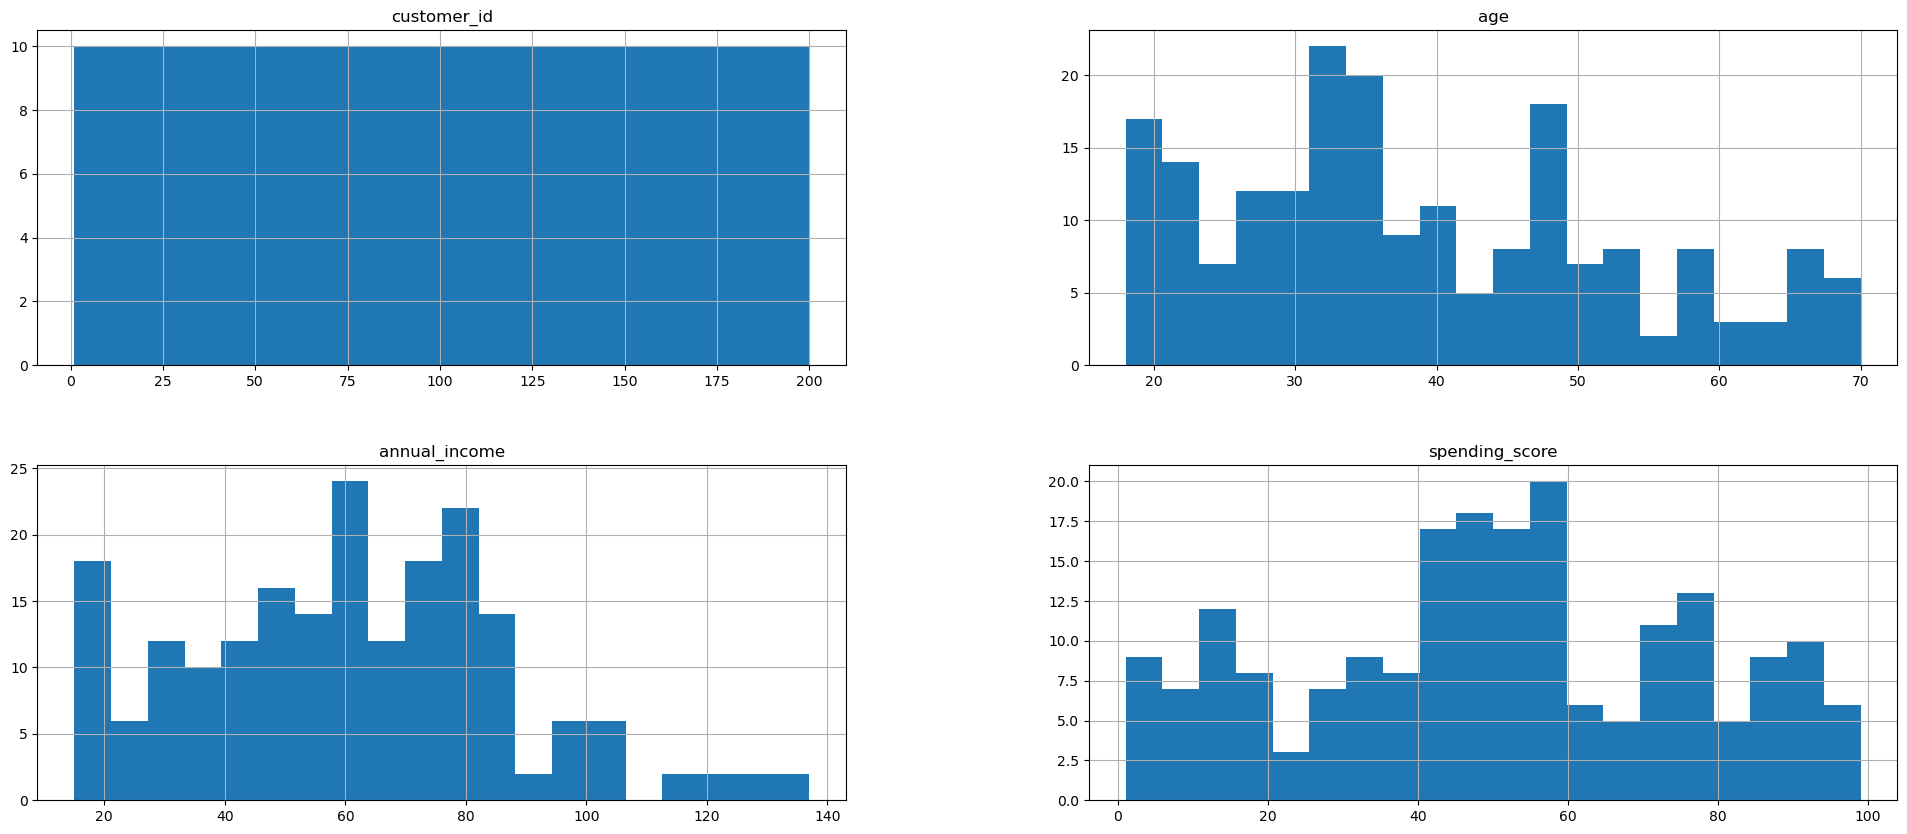

In [56]:
df.hist(figsize=(24, 10), bins=20)


3. Detect outliers using IQR.

In [57]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


In [58]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
customer_id_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: customer_id_outliers, dtype: float64
~~~
age_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_outliers, dtype: float64
~~~
annual_income_outliers
count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_outliers, dtype: float64
~~~
spending_score_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_outliers, dtype: float64


4. Split data into train, validate, and test.

In [59]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on taxvaluedollarcnt.
    return train, validate, test DataFrames.
    '''


    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

train, validate, test = split_data(df)

In [60]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
123,124,Male,39,69,91,0,0,0.0,0
76,77,Female,45,54,53,0,0,0.0,0
171,172,Male,28,87,75,0,0,0.0,0
10,11,Male,67,19,14,0,0,0.0,0
35,36,Female,21,33,81,0,0,0.0,0


5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [61]:
dummy_df = pd.get_dummies(train['gender'],dummy_na=False, drop_first = True)
#append to add encoded col to df
train = pd.concat([train, dummy_df], axis=1)

In [62]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,Male
123,124,Male,39,69,91,0,0,0.0,0,1
76,77,Female,45,54,53,0,0,0.0,0,0
171,172,Male,28,87,75,0,0,0.0,0,1
10,11,Male,67,19,14,0,0,0.0,0,1
35,36,Female,21,33,81,0,0,0.0,0,0


6. Handles missing values.

In [63]:
train.isnull().sum()

customer_id                0
gender                     0
age                        0
annual_income              0
spending_score             0
customer_id_outliers       0
age_outliers               0
annual_income_outliers     0
spending_score_outliers    0
Male                       0
dtype: int64

In [64]:
cols_to_remove = ['customer_id_outliers','age_outliers','annual_income_outliers','spending_score_outliers']
train.drop(columns=cols_to_remove)

,customer_id,gender,age,annual_income,spending_score,Male
123,124,Male,39,69,91,1
76,77,Female,45,54,53,0
171,172,Male,28,87,75,1
10,11,Male,67,19,14,1
35,36,Female,21,33,81,0
...,...,...,...,...,...,...
175,176,Female,30,88,86,0
101,102,Female,49,62,48,0
148,149,Female,34,78,22,0
99,100,Male,20,61,49,1


7. Scaling

Text(0.5, 1.0, 'Scaled')

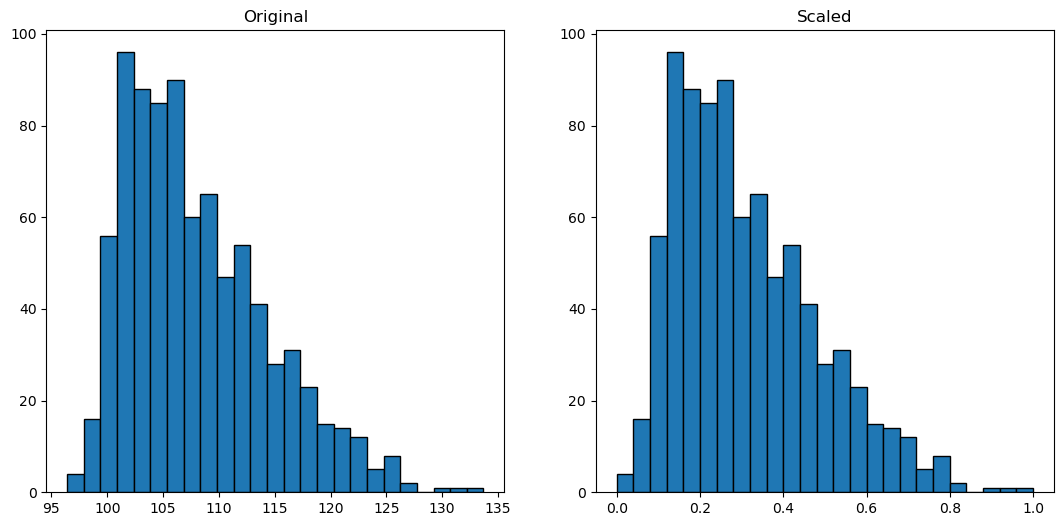

In [65]:
import sklearn.preprocessing
from scipy import stats
import matplotlib.pyplot as plt


x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)
#I first again split, to have a set of data that is not scaled and one
#that is scaled:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')